In [1]:
dataset = "chest"
n_shot = 1
config = f"../configs/swin-b_vpt/{n_shot}-shot_{dataset}.py"

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

from mmengine.config import Config, ConfigDict, DictAction
from mmengine.runner import Runner

In [7]:
cfg = Config.fromfile(config)
# fix paths in train_dataloader
cfg.train_dataloader.dataset.data_prefix = os.path.join("..", cfg.train_dataloader.dataset.data_prefix)
cfg.train_dataloader.dataset.ann_file = os.path.join("..", cfg.train_dataloader.dataset.ann_file)
cfg.val_dataloader.dataset.data_prefix = os.path.join("..", cfg.val_dataloader.dataset.data_prefix)
cfg.val_dataloader.dataset.ann_file = os.path.join("..", cfg.val_dataloader.dataset.ann_file)
# set batch_size to 1
cfg.train_dataloader.batch_size = 1
cfg.train_dataloader.sampler.shuffle = False

In [8]:
# get train dataset from config
data_prefix = cfg.train_dataloader.dataset.data_prefix
ann_file = cfg.train_dataloader.dataset.ann_file
data_prefix, ann_file

('..\\data/MedFMC_train/chest/images',
 '..\\data_anns/MedFMC/chest_new/chest_1-shot_train_exp21.txt')

In [9]:
runner = Runner.from_cfg(cfg)

08/25 15:54:21 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: win32
    Python: 3.8.0 (tags/v3.8.0:fa919fd, Oct 14 2019, 19:37:50) [MSC v.1916 64 bit (AMD64)]
    CUDA available: True
    numpy_random_seed: 1151916974
    GPU 0: NVIDIA GeForce RTX 3060
    CUDA_HOME: C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v10.2
    NVCC: Not Available
    GCC: n/a
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - C++ Version: 199711
  - MSVC 193431937
  - Intel(R) Math Kernel Library Version 2020.0.2 Product Build 20200624 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 2019
  - LAPACK is enabled (usually provided by MKL)
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_

In [156]:
# load image paths from txt ann_file to list and remove labels
with open(ann_file, "r") as f:
    lines = f.readlines()
    image_files = [line.split(" ")[0] for line in lines]

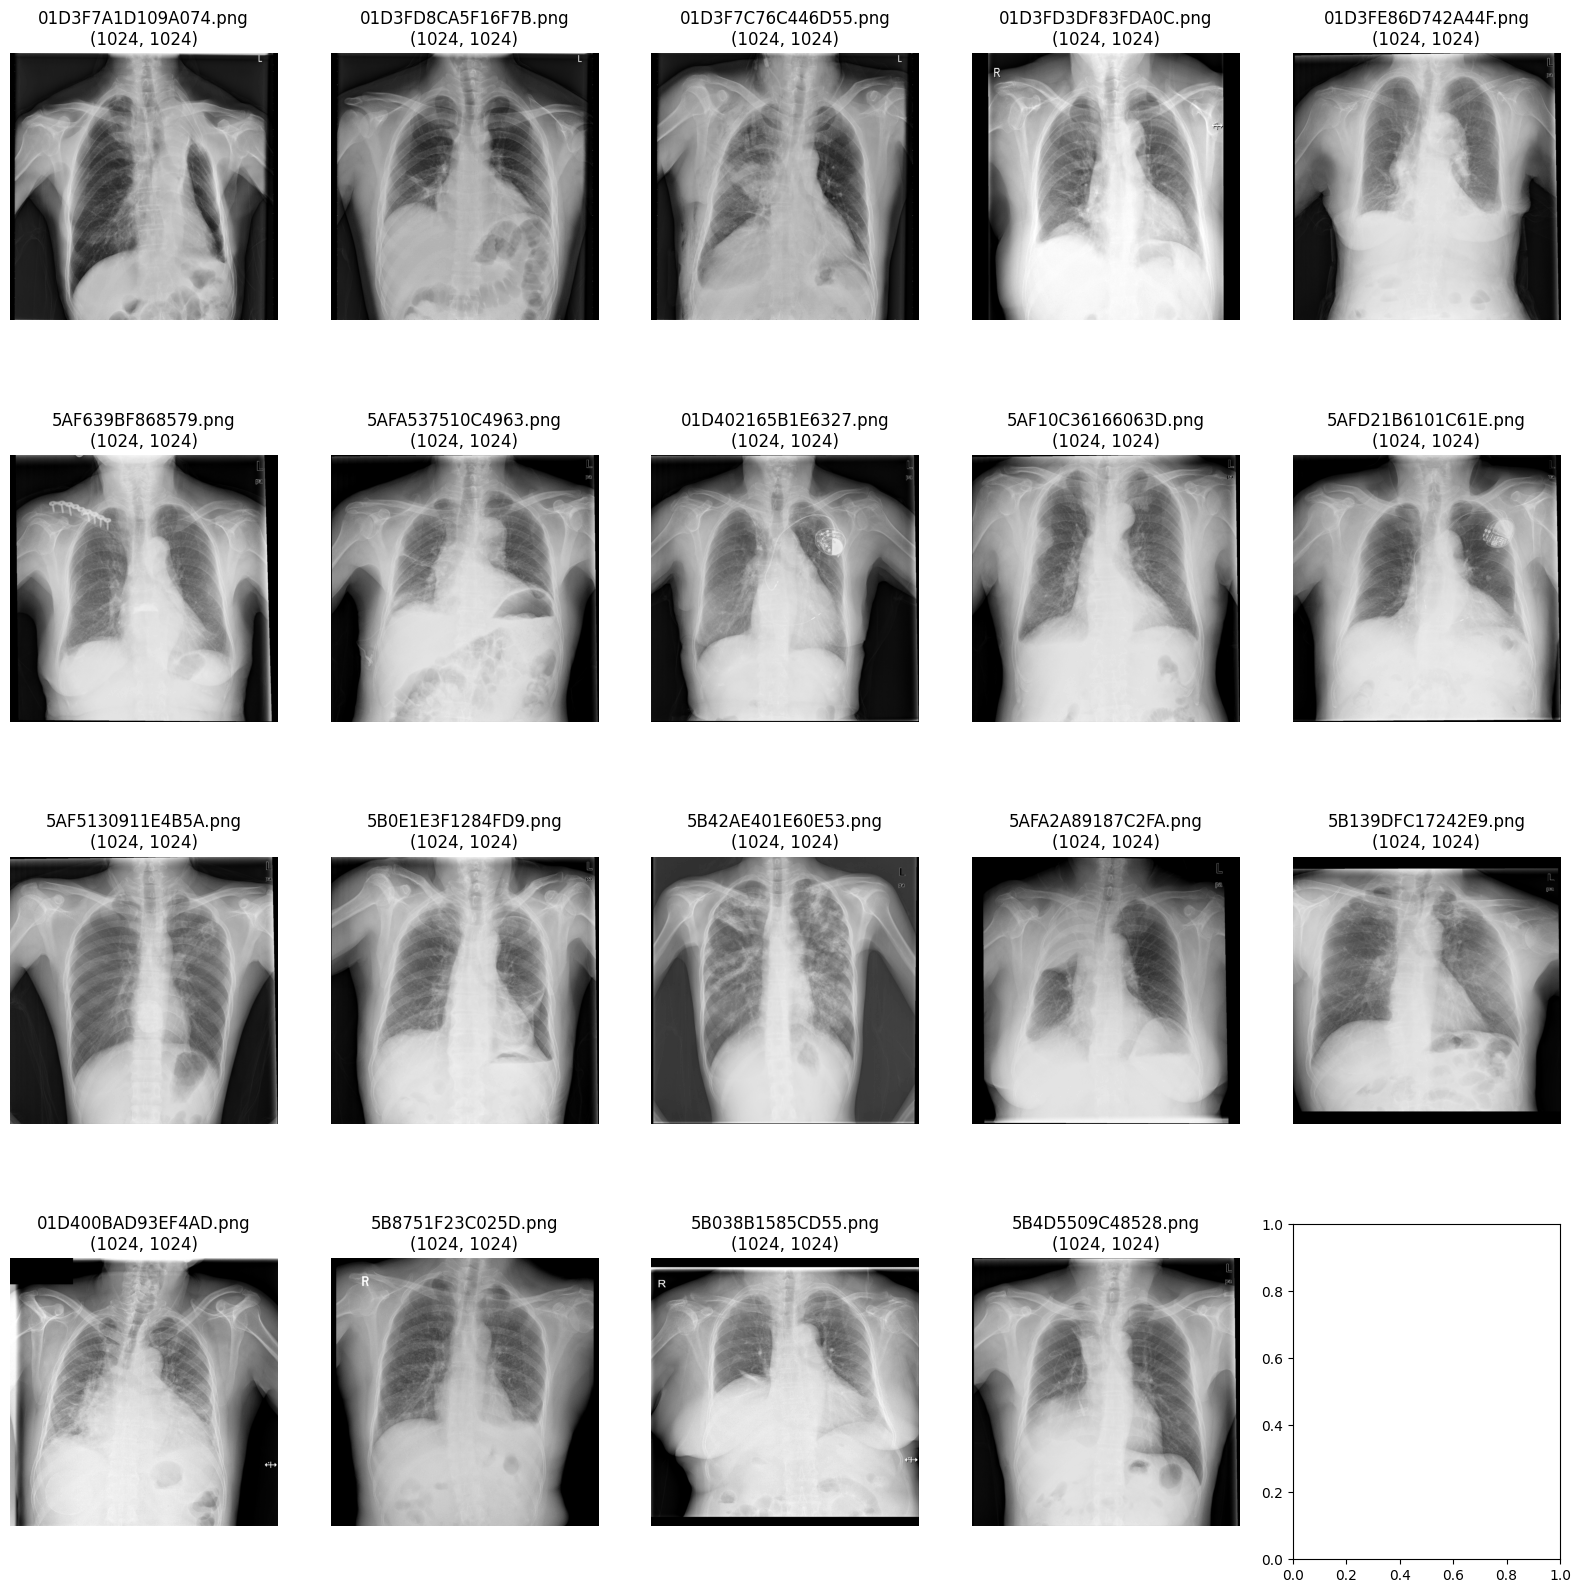

In [157]:
# plot all 19 images from dataset in a 4 x 5 subplot in grayscale, load as grayscale as well
# add filename and resolution as title
# iterate over image_files
import cv2
fig, axs = plt.subplots(4, 5, figsize=(20, 20))
for i, img_path in enumerate(image_files):
    # load image as grayscale
    img = cv2.imread(os.path.join(data_prefix, img_path), cv2.IMREAD_GRAYSCALE)
    # get image title
    title = os.path.basename(img_path)
    ax = axs[i // 5, i % 5]
    ax.imshow(img, cmap="gray")
    ax.set_title(f"{title}\n{img.shape}")
    ax.axis("off")

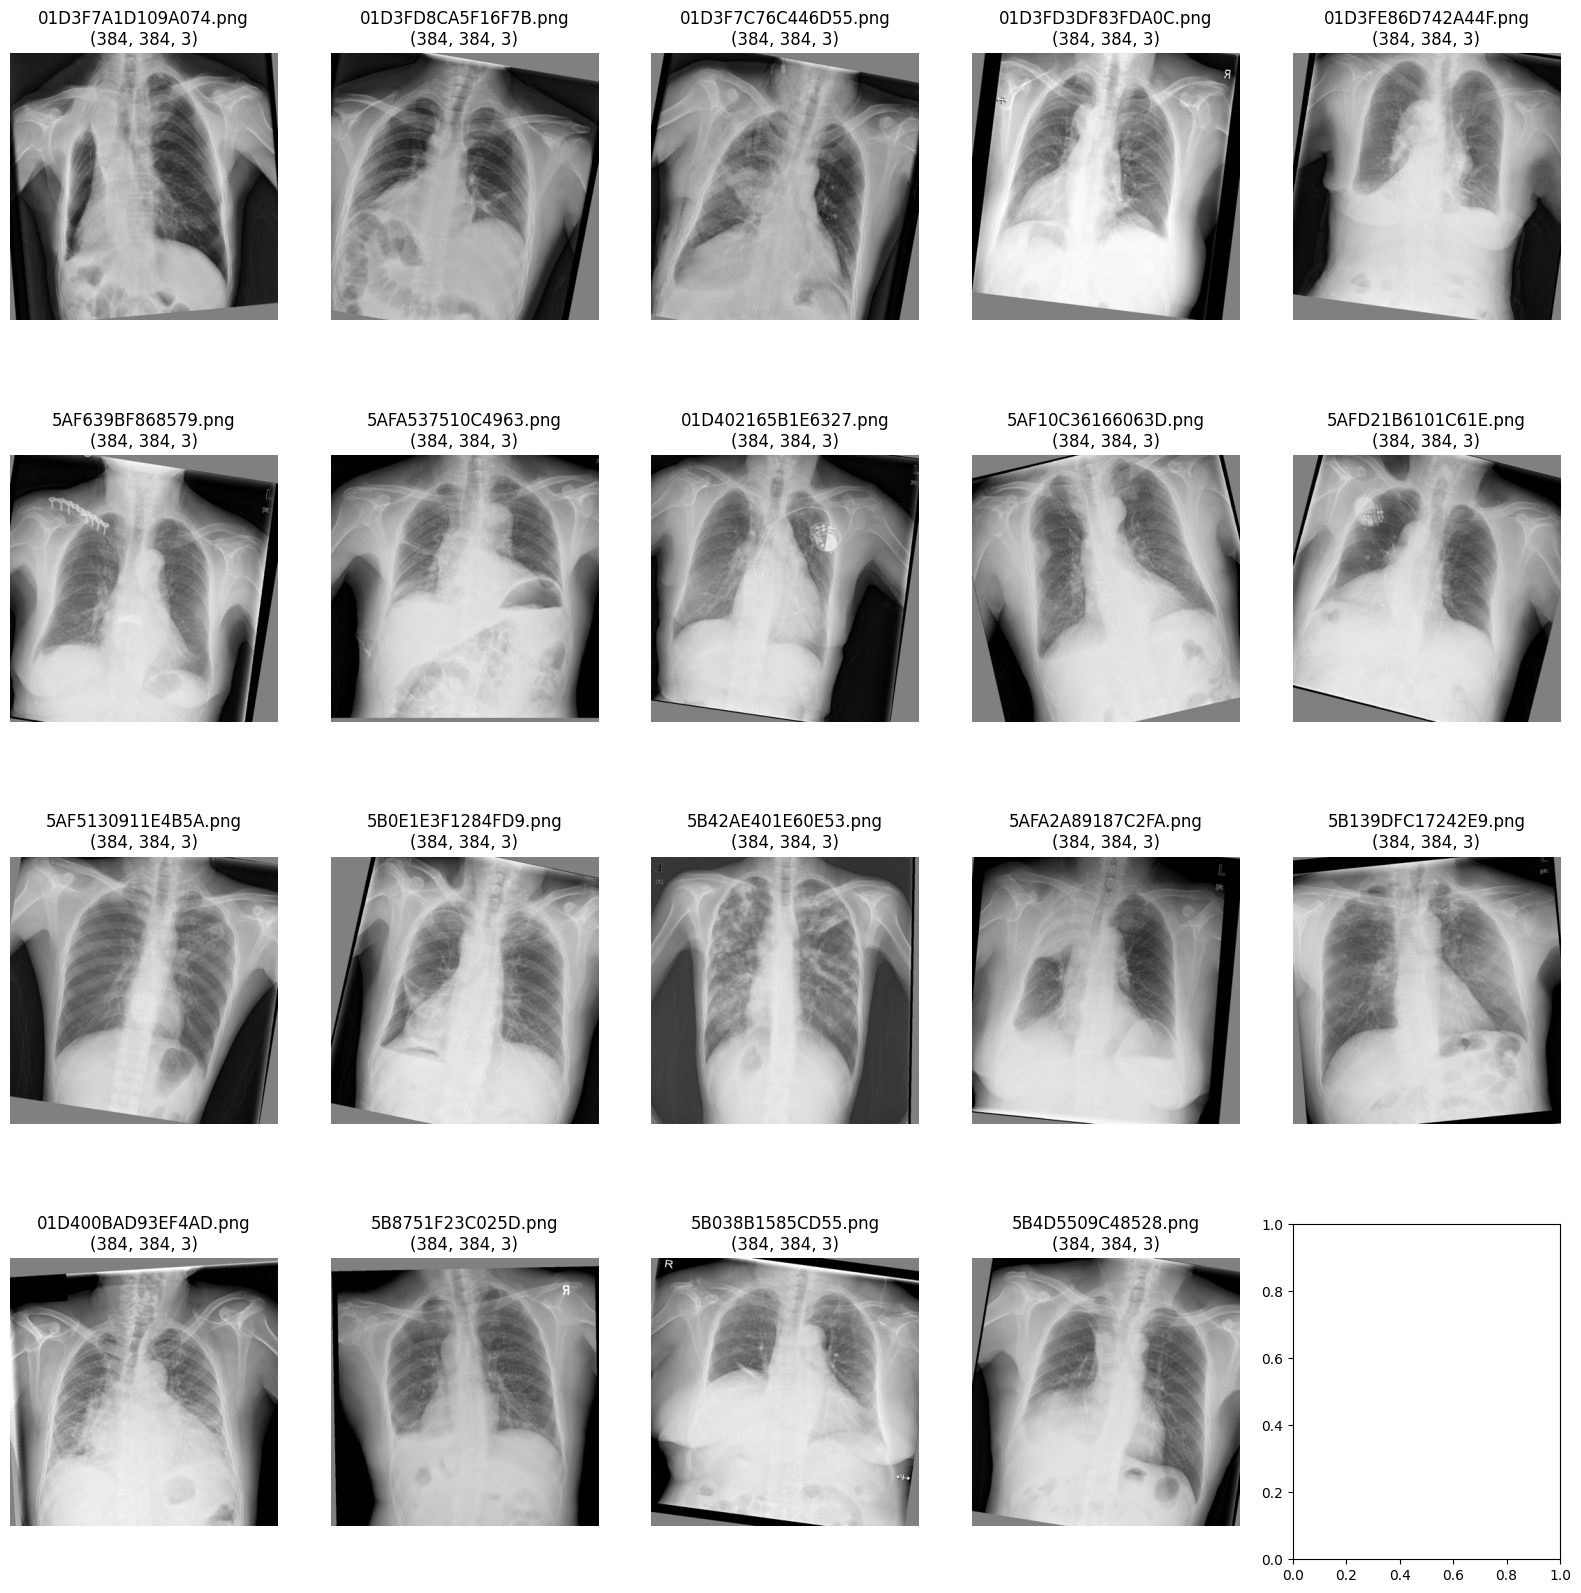

In [159]:
# display some images using the dataloader from the runner.train_dataloader
fig, axs = plt.subplots(4, 5, figsize=(20, 20))
for i, batch in enumerate(runner.train_dataloader):
    # get image from batch and convert from tensor to numpy
    img = batch["inputs"][0].numpy()
    # swap axes to get img to channels last
    img = img.transpose(1, 2, 0)
    # get image title
    title = os.path.basename(batch["data_samples"][0].img_path)
    ax = axs[i // 5, i % 5]
    ax.imshow(img, cmap="gray")
    ax.set_title(f"{title}\n{img.shape}")
    ax.axis("off")
    if i % 1 == 18:
        break

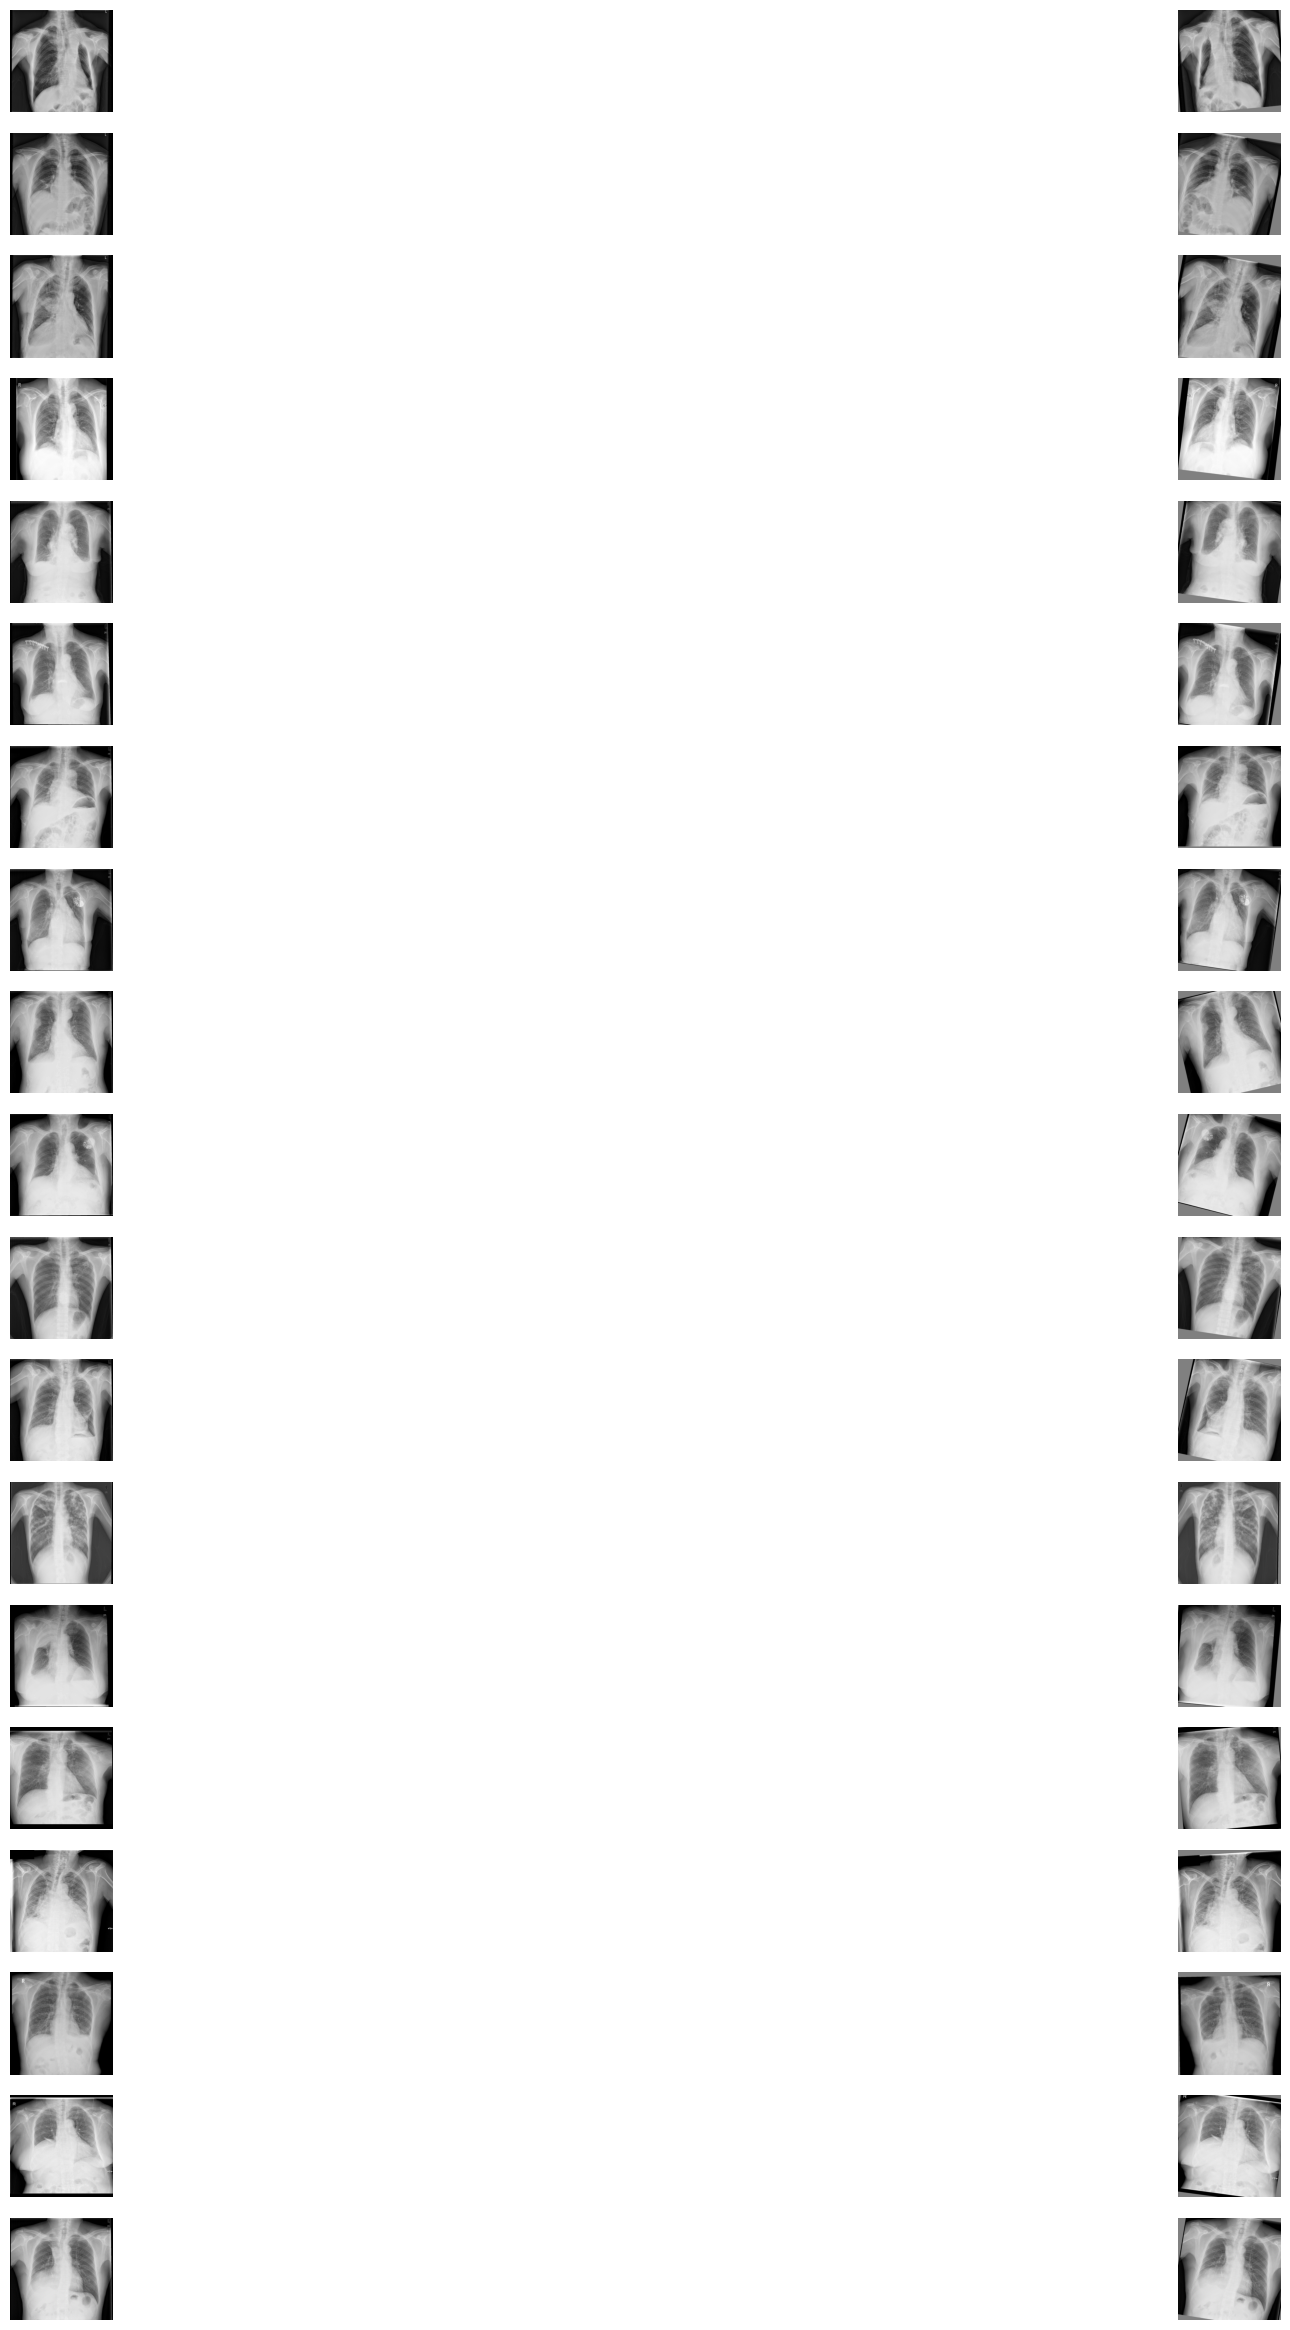

In [182]:
# plot the unaugmented image files and the augmented images from the dataloader given by the cfg side by side, one image pair per row
dataset_size = 19
fig, axs = plt.subplots(dataset_size, 2, figsize=(30, 30))
for i, img_path in enumerate(image_files):
    # load image as grayscale
    img = cv2.imread(os.path.join(data_prefix, img_path), cv2.IMREAD_GRAYSCALE)
    # get image title
    title = os.path.basename(img_path)
    ax = axs[i, 0]
    ax.imshow(img, cmap="gray")
    #ax.set_title(f"{title}\n{img.shape}")
    ax.axis("off")

for i, batch in enumerate(runner.train_dataloader):
    # get image from batch and convert from tensor to numpy
    img = batch["inputs"][0].numpy()
    # swap axes to get img to channels last
    img = img.transpose(1, 2, 0)
    # get image title
    title = os.path.basename(batch["data_samples"][0].img_path)
    ax = axs[i, 1]
    ax.imshow(img, cmap="gray")
    #ax.set_title(f"{title}\n{img.shape}")
    ax.axis("off")
    if i % 1 == 18:
        break

plt.subplots_adjust(wspace=0.01)


In [11]:
for i, batch in enumerate(runner.train_dataloader):
    img = batch["inputs"][0].numpy()
    print(img)
    if i % 10 == 0:
        break

[[[128 128 128 ... 128 128 128]
  [128 128 128 ... 128 128 128]
  [128 128 128 ... 128 128 128]
  ...
  [128 128 128 ...  30  31  31]
  [128 128 128 ...  30  30  31]
  [128 128 128 ...  30  30  32]]

 [[128 128 128 ... 128 128 128]
  [128 128 128 ... 128 128 128]
  [128 128 128 ... 128 128 128]
  ...
  [128 128 128 ...  30  31  31]
  [128 128 128 ...  30  30  31]
  [128 128 128 ...  30  30  32]]

 [[128 128 128 ... 128 128 128]
  [128 128 128 ... 128 128 128]
  [128 128 128 ... 128 128 128]
  ...
  [128 128 128 ...  30  31  31]
  [128 128 128 ...  30  30  31]
  [128 128 128 ...  30  30  32]]]


In [10]:
for i, batch in enumerate(runner.val_dataloader):
    img = batch["inputs"][0].numpy()
    print(img)
    if i % 10 == 0:
        break

08/25 15:54:32 - mmengine - WARNING - Neither thr nor k is given, set thr as 0.5 by default.
[[[252 254 252 ... 242 244 245]
  [249 248 247 ... 194 196 200]
  [248 244 241 ... 129 130 129]
  ...
  [244 246 246 ...  95  97  97]
  [244 246 245 ...  97 101 101]
  [240 242 244 ... 103 106 113]]

 [[252 254 252 ... 242 244 245]
  [249 248 247 ... 194 196 200]
  [248 244 241 ... 129 130 129]
  ...
  [244 246 246 ...  95  97  97]
  [244 246 245 ...  97 101 101]
  [240 242 244 ... 103 106 113]]

 [[252 254 252 ... 242 244 245]
  [249 248 247 ... 194 196 200]
  [248 244 241 ... 129 130 129]
  ...
  [244 246 246 ...  95  97  97]
  [244 246 245 ...  97 101 101]
  [240 242 244 ... 103 106 113]]]


In [14]:
runner.model.forward?